<a href="https://colab.research.google.com/github/Xiao215/ECE421/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install -q scikit-learn
!pip3 install -q numpy
!pip3 install -q matplotlib

In [3]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [18]:
breast_cancer_data = load_breast_cancer()
# the data contains 569 data samples of vectors
data = np.array(breast_cancer_data['data'])

#@markdown the number of cluster to start
k_start = 2 #@param {type:"number"}
#@markdown the number of cluster to start
k_final = 7 #@param {type:"number"}

#@markdown the trail number
trail = 5 #@param {type:"number"}

# check if k doesn't fit into the size

if k_final > len(data) or k_final < 1:
  raise ValueError(f"k should be less than or equal to the length of the data sample, which is {len(data)}")


In [5]:
def getDistance(vec1: np.ndarray, vec2: np.ndarray) -> float:
  """Calculate the Euclidean distance between any two vector"""
  if vec1.shape != vec2.shape:
    raise ValueError("Both arrays should have the same shape.")
  return np.linalg.norm(vec1 - vec2)

In [6]:
def getCost(mapping: dict[int, list[np.ndarray]], centroids: np.ndarray) -> float:
  cost = 0
  count = 0
  for index, vectors in mapping.items():
    count += len(vectors)
    centroid = centroids[index]
    for vec in vectors:
      cost += getDistance(vec, centroid)**2
  return cost / count


In [7]:
def KMeans(k: int, init_method: str, data: np.ndarray) -> tuple[np.ndarray, float]:
  best_set = (None, float('inf'))
  for i in range(trail):
    centroids = np.array([])
    new_centroids = np.array([])
    if init_method == "Random Initialization":
      upper = 0  # Lower bound
      lower = 1e+05  # Upper bound
      data_width = len(data[0])
      new_centroids = lower + (upper - lower) * np.random.rand(k, data_width)
    elif init_method == "Forgy Method":
      unique_data = np.unique(data, axis = 0)
      if (len(unique_data) < k):
        raise ValueError("Not enough unique data points for the number of centroids.")
      # generate the random indices without replacement
      indices = np.random.choice(unique_data.shape[0], k, replace=False)
      new_centroids = unique_data[indices, :]
    else:
      raise ValueError("Model selected does not exist.")


    centroid_assignments = {}
    # The entire step of updating centroids will run until
    # there isn't any new changes
    while not np.array_equal(centroids, new_centroids):
      centroids = new_centroids
      new_centroids = []
      # Cluster Assignment

      # assign with key as index
      centroid_assignments = {i : [] for i in range(len(centroids))}
      for vector in data:
        # for each vector, find the closest centroid
        closest_index = None
        closest_distance = float('inf')
        for index, centroid in enumerate(centroids):
          if getDistance(vector, centroid) < closest_distance:
            closest_distance = getDistance(vector, centroid)
            closest_index = index
        if(closest_index == None):
          raise ValueError("The centroids list is empty.")
        centroid_assignments[closest_index].append(vector)

      # Centroids Update
      for index, vectors in centroid_assignments.items():
        # edge case if one centroid has no points belong to them
        if (len(vectors) == 0):
          new_centroids.append(centroids[index])
        else:
          new_centroids.append(np.mean(vectors, axis=0))
      new_centroids = np.array(new_centroids)
    #   print(f"in progress: {new_centroids}")
    # print(f"test: {new_centroids}")
    cost = getCost(centroid_assignments, new_centroids)
    # for all the trails, we only leave the set with least cost
    if best_set[1] > cost:
      best_set = (new_centroids, cost)
  return best_set

In [8]:
# implement the initialization of centroids

#@markdown Choose initialization method
init_method = "Forgy Method" #@param ["Random Initialization", "Forgy Method", "K-means++"]

k_range = range(k_start, k_final+1)
costs = []
for k in k_range:
  costs.append(KMeans(k, init_method, data)[1])

Between k=2 and k=3, a 35.19% drop in cost is observed.
Between k=3 and k=4, a 42.15% drop in cost is observed.
Between k=4 and k=5, a 29.46% drop in cost is observed.
Between k=5 and k=6, a 17.36% drop in cost is observed.
Between k=6 and k=7, a 22.13% drop in cost is observed.


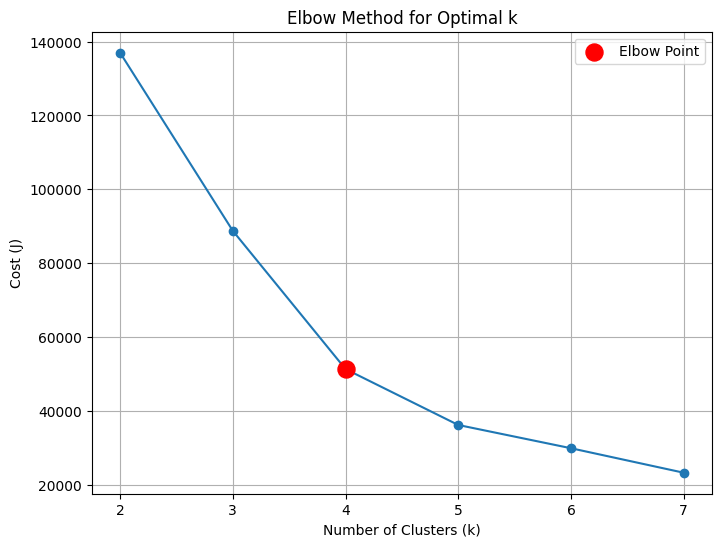

In [19]:
diff = np.diff(costs)
# We use this drop rate to determine, between which two costs,
# the rate of cost decreased the most,
# and we take the index of the second point
drop_rates = []
for cost, drop in zip(costs, diff):
  drop_rates.append(100*drop/cost)
elbow_index = np.argmax(np.absolute(drop_rates)) + 1

for i, drop_rate in enumerate(drop_rates):
  print(f'Between k={i+2} and k={i+3}, a {-round(drop_rate, 2)}% drop in cost is observed.')

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, costs, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (J)')
plt.xticks(k_range)
plt.grid(True)
plt.scatter(k_range[elbow_index], costs[elbow_index], s=150, c='red', label='Elbow Point', zorder=5)
plt.legend()
plt.show()

As calculated by the cost drop rate, between k=3 and k=4, the drop rate is the most, reaching 42%, but decreased after this. Therefore, **k=4** *italicized text* is chosen to be the most effective k value. *italicized text*